In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [11]:
df = pd.read_csv("data/ina-csa-parole-femmes-chaines.csv")
df


,media,Editeur,group,nb_declarations_2020,total_declarations_duration_2020,women_speech_duration_2020,men_speech_duration_2020,other_duration_2020,women_expression_rate_2020,speech_rate_2020,nb_declarations_2019,total_declarations_duration_2019,women_speech_duration_2019,men_speech_duration_2019,other_duration_2019,women_expression_rate_2019,speech_rate_2019
0,radio,Europe 1,Lagardère Active,3602.0,14877545.46,5432042.70,8220712.70,1224790.06,0.397872,0.917675,1684.0,9823492.72,3658937.50,5239559.62,924995.60,0.411186,0.905838
1,radio,Fip,Radio France,199.0,5270382.76,154044.20,64874.40,5051464.16,0.703660,0.041538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,radio,France Culture,Radio France,2689.0,6933822.84,2357921.72,3762353.06,813548.06,0.385264,0.882670,2816.0,6959811.16,2309011.64,3907866.70,742932.82,0.371410,0.893254
3,radio,France Info,Radio France,850.0,7416247.18,2161868.06,4782895.82,471483.30,0.311295,0.936426,853.0,7020833.94,2075132.98,4541026.20,404674.76,0.313646,0.942361
4,radio,France Inter,Radio France,3707.0,8577861.92,2801560.84,4334779.34,1441521.74,0.392577,0.831949,3505.0,8298411.00,2532256.62,4415065.80,1351088.58,0.364494,0.837187
5,radio,France Musique,Radio France,1196.0,5544350.10,462351.82,745503.74,4336494.54,0.382787,0.217853,1058.0,4634473.30,410668.48,695391.38,3528413.44,0.371290,0.238659
6,radio,FunRadio,M6,262.0,1889994.26,384335.62,696198.48,809460.16,0.355690,0.571713,178.0,1623596.48,405759.86,759977.68,457858.94,0.348071,0.717997
7,radio,Mouv,Radio France,594.0,4514387.90,272227.64,546768.78,3695391.48,0.332392,0.181419,534.0,3689987.58,204603.60,538614.28,2946769.70,0.275294,0.201415
8,radio,NOSTALGIE,NRJ,252.0,4553985.80,404643.16,725570.06,3423772.58,0.358024,0.248181,183.0,4355996.40,447301.48,704421.08,3204273.84,0.388376,0.264399
9,radio,NRJ,NRJ,222.0,3841187.82,367455.74,1223327.56,2250404.52,0.230990,0.414138,294.0,4246695.38,420503.00,1221784.44,2604407.94,0.256047,0.386721


In [12]:
df1 = pd.DataFrame({
    'media' : ['Radio', 'TV'],
    'men_speech_2019' : [df['men_speech_duration_2019'].iloc[0:13].sum(), df['men_speech_duration_2019'].iloc[14:34].sum()],
    'women_speech_2019' : [df['women_speech_duration_2019'].iloc[0:13].sum(), df['women_speech_duration_2019'].iloc[14:34].sum()],
    'men_speech_2020' : [df['men_speech_duration_2020'].iloc[0:13].sum(), df['men_speech_duration_2020'].iloc[14:34].sum()],
    'women_speech_2020' : [df['women_speech_duration_2020'].iloc[0:13].sum(), df['women_speech_duration_2020'].iloc[14:34].sum()],
})
df1 

,media,men_speech_2019,women_speech_2019,men_speech_2020,women_speech_2020
0,Radio,35328555.12,17728716.78,43107694.32,22457296.86
1,TV,51621693.66,27570987.30,45708302.42,24591885.16


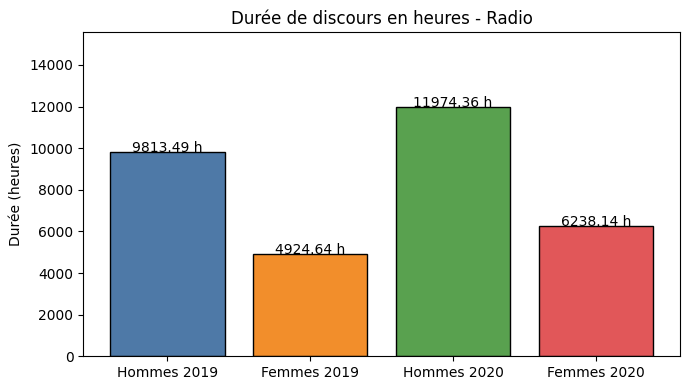

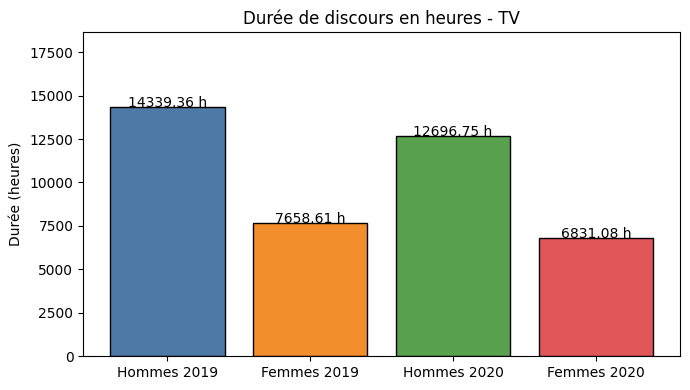

In [14]:
def plot_media_bars(df, media_name):
    df_media = df[df['media'] == media_name]
    
    # Conversion en heures (1 heure = 3600 secondes)
    men_2019 = df_media['men_speech_2019'].values[0] / 3600
    women_2019 = df_media['women_speech_2019'].values[0] / 3600
    men_2020 = df_media['men_speech_2020'].values[0] / 3600
    women_2020 = df_media['women_speech_2020'].values[0] / 3600
    categories = ['Hommes 2019', 'Femmes 2019', 'Hommes 2020', 'Femmes 2020']
    values = [men_2019, women_2019, men_2020, women_2020]
    colors = ['#4e79a7', '#f28e2b', '#59a14f', '#e15759']
    plt.figure(figsize=(7, 4))
    bars = plt.bar(categories, values, color=colors, edgecolor='black')
    
    plt.title(f"Durée de discours en heures - {media_name}")
    plt.ylabel("Durée (heures)")
    plt.ylim(0, max(values) * 1.3)
    # Afficher les valeurs au-dessus des barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f"{height:.2f} h", ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()
# Tracer les graphiques séparément
plot_media_bars(df1, 'Radio')
plot_media_bars(df1, 'TV')